<a href="https://colab.research.google.com/github/monicafar147/classification-predict-streamlit-template/blob/Template/climate_change_monica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-deep')

#text preprocessing
import re
import nltk
from nltk.corpus import stopwords

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Importing the data

In [0]:
train = pd.read_csv("https://raw.githubusercontent.com/monicafar147/classification-predict-streamlit-template/master/climate-change-belief-analysis/train.csv")
test = pd.read_csv("https://raw.githubusercontent.com/monicafar147/classification-predict-streamlit-template/master/climate-change-belief-analysis/test.csv")

In [3]:
train.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


# EDA

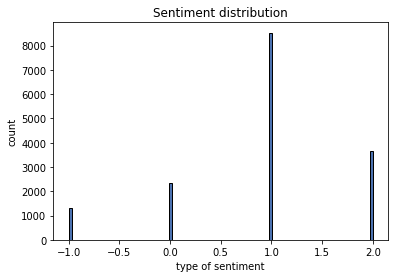

In [4]:
plt.hist(train['sentiment'], bins = 100, edgecolor = 'k')
plt.xlabel('type of sentiment')
plt.ylabel('count')
plt.title('Sentiment distribution')
plt.show()

Majority of the tweets in the training data were classified as type 1.

In [0]:
# explore the word count and tweet lengths
train['length'] = train['message'].astype(str).apply(len)
train['word_count'] = train['message'].apply(lambda x: len(str(x).split()))
test['length'] = test['message'].astype(str).apply(len)
test['word_count'] = test['message'].apply(lambda x: len(str(x).split()))

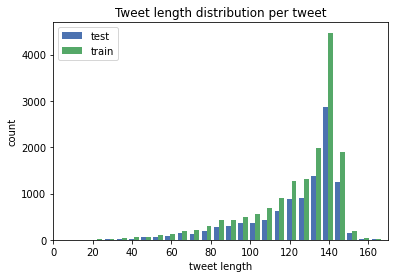

In [6]:
plt.hist([test['length'], train['length']], bins=100, label=['test', 'train'])
plt.title('Tweet length distribution per tweet')
plt.xlabel('tweet length')
plt.ylabel('count')
plt.legend(loc='upper left')
plt.xlim([0,170])
plt.show()


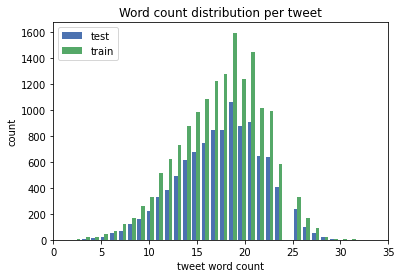

In [7]:
plt.hist([test['word_count'], train['word_count']], bins=100, label=['test', 'train'])
plt.title('Word count distribution per tweet')
plt.xlabel('tweet word count')
plt.ylabel('count')
plt.legend(loc='upper left')
plt.xlim([0,35])
plt.show()


# Data preprocessing

Combine the train and test data inorder to do preprocessing on both datasets.
This is essential to test the models being built.
This step will also be useful for implementing the API.

In [0]:
data = train[['sentiment','message','tweetid']].append(test[['message','tweetid']], ignore_index=True)

In [9]:
data.head()

,sentiment,message,tweetid
0,1.0,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1.0,It's not like we lack evidence of anthropogeni...,126103
2,2.0,RT @RawStory: Researchers say we have three ye...,698562
3,1.0,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1.0,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


In [10]:
# lowercase the tweets
data['message'] = data['message'].apply(lambda word: "".join(word.lower()))
data.head()

,sentiment,message,tweetid
0,1.0,polyscimajor epa chief doesn't think carbon di...,625221
1,1.0,it's not like we lack evidence of anthropogeni...,126103
2,2.0,rt @rawstory: researchers say we have three ye...,698562
3,1.0,#todayinmaker# wired : 2016 was a pivotal year...,573736
4,1.0,"rt @soynoviodetodas: it's 2016, and a racist, ...",466954


In [11]:
# remove stopwords
stop_words = stopwords.words('english')
data['without_stopwords'] = data['message'].apply(lambda word: " ".join(word for word in word.split() if word not in stop_words))
data.head()

,sentiment,message,tweetid,without_stopwords
0,1.0,polyscimajor epa chief doesn't think carbon di...,625221,polyscimajor epa chief think carbon dioxide ma...
1,1.0,it's not like we lack evidence of anthropogeni...,126103,like lack evidence anthropogenic global warming
2,2.0,rt @rawstory: researchers say we have three ye...,698562,rt @rawstory: researchers say three years act ...
3,1.0,#todayinmaker# wired : 2016 was a pivotal year...,573736,#todayinmaker# wired : 2016 pivotal year war c...
4,1.0,"rt @soynoviodetodas: it's 2016, and a racist, ...",466954,"rt @soynoviodetodas: 2016, racist, sexist, cli..."


In [0]:
def remove_pattern(text,pattern):
    usernames = re.findall(pattern, text)
    for user in usernames:
        text = re.sub(user, '', text)
    return text

In [0]:
# remove URL
#for index,row in data.iterrows():
#  row['without_URL'] = re.sub('((www\.[^\s]+)|(https?://[^\s]+))','URL',row['without_URL'])

In [0]:
# remove hashtags
data['removed_hashtag'] = np.vectorize(remove_pattern)(data['without_stopwords'],"#[\w]*")

In [15]:
data.head()

,sentiment,message,tweetid,without_stopwords,removed_hashtag
0,1.0,polyscimajor epa chief doesn't think carbon di...,625221,polyscimajor epa chief think carbon dioxide ma...,polyscimajor epa chief think carbon dioxide ma...
1,1.0,it's not like we lack evidence of anthropogeni...,126103,like lack evidence anthropogenic global warming,like lack evidence anthropogenic global warming
2,2.0,rt @rawstory: researchers say we have three ye...,698562,rt @rawstory: researchers say three years act ...,rt @rawstory: researchers say three years act ...
3,1.0,#todayinmaker# wired : 2016 was a pivotal year...,573736,#todayinmaker# wired : 2016 pivotal year war c...,wired : 2016 pivotal year war climate change ...
4,1.0,"rt @soynoviodetodas: it's 2016, and a racist, ...",466954,"rt @soynoviodetodas: 2016, racist, sexist, cli...","rt @soynoviodetodas: 2016, racist, sexist, cli..."


In [0]:
# remove username
data['removed_user_tweet'] = np.vectorize(remove_pattern)(data['removed_hashtag'],"@[\w]*")

In [0]:
#Removing Punctuations, Numbers, and Special Characters
data['tidy_tweet'] = data['removed_user_tweet'].str.replace("[^a-zA-Z#]", " ")


In [0]:
# removing Short Words
data['tidy_tweet'] = data['tidy_tweet'].apply(lambda word: ' '.join([word for word in word.split() if len(word)>3]))

In [20]:
# print out cleaned text
for_msg = [i for i in data['tidy_tweet']]
index = 1
for i in for_msg[0:10]:
    print(str(index)+": " + i)
    print('\n')
    index += 1

1: polyscimajor chief think carbon dioxide main cause global warming wait what https yelvcefxkc


2: like lack evidence anthropogenic global warming


3: researchers three years climate change late https kdur https anpt


4: wired pivotal year climate change https wotxtlcd


5: racist sexist climate change denying bigot leading polls


6: worth read whether believe climate change https gglzvnyjun https


7: mike pence doesn believe global warming smoking causes lung cancer https gvwyaauu


8: things today fight climate change climate activist https tymlu dbnm


9: nephew inconsolable wants like perish fiery hellscape climate change


10: offense like believe global warming




1. does URL have impact on tweet sentiment?
2. does retweet have any impact on tweet sentiment?
3. does removing hashtags remove sentment?
4. contractions are a problem - removing doesn't -> doesn

# Modelling

# Performance evaluation

# Model analysis